#  Прогнозування орендної плати за житло

## Мета завдання
Побудувати моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Пройти весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Етап 1: Завантаження та перший огляд даних 

На цьому етапі виконано початкову обробку та дослідження набору даних House_Rent_Dataset.csv.
Мета — отримати загальне уявлення про структуру, обсяг та типи змінних.

**Виконані дії:**
1. Завантажено датасет у середовище Python за допомогою бібліотеки pandas.
2. Перевірено розмір таблиці (кількість рядків і стовпців).
3. Виведено перші 5 записів для ознайомлення зі структурою.
4. Отримано загальну інформацію про типи змінних та наявність пропусків.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv', sep=None, engine='python')


In [3]:
df.shape

(4746, 12)

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


## Етап 2: Дослідницький аналіз даних (EDA)
Мета- отримання глибшого розуміння характеристик набору даних та виявити потенційні закономірності

**Виконані дії:**
1. Аналіз пропущених значень.
2. Базова статистика.
3. Аналіз цільової змінної.
4. Робота з викидами.
5. Аналіз категоріальних змінних.

In [6]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_percent

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [7]:
stats = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [8]:
 # Гістограма розподілу цільової змінної (Rent)
fig = px.histogram(
    df,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (орендна плата)',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість оголошень'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік1.png",
    scale=2,      
    width=900,
    height=600
)



https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA1.png

In [9]:
# Виявлення викидів
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Межі для Rent:", lower_bound, upper_bound)
df_no_outliers = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]
print("Було рядків:", len(df))
print("Залишилось без викидів:", len(df_no_outliers))

Межі для Rent: -24500.0 67500.0
Було рядків: 4746
Залишилось без викидів: 4226


In [10]:
# Гістограма розподілу цільової змінної (Rent) після видалення викидів
fig = px.histogram(
    df_no_outliers,
    x='Rent',
    nbins=100,
    title='Розподіл орендної плати після видалення викидів',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість оголошень'}
)
fig.update_layout(showlegend=False, height=400)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік2.png",
    scale=2,      
    width=900,
    height=600
)


http://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA2.png

In [11]:
df_no_outliers[['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']].nunique()

Floor                 340
Area Type               3
Area Locality        1997
City                    6
Furnishing Status       3
Tenant Preferred        3
dtype: int64

Висновок:
- У наборі даних відсутні пропущені значення у числових стовпцях, тому попередня очистка не потребувалася.
- Основна змінна Rent має значний розкид значень — від 1200 до 3 500 000, що свідчить про наявність дорогих об’єктів.
- Після видалення викидів за методом IQR залишилося 4 226 записів із початкових 4 746.
- Дані охоплюють 6 міст і містять різні категорії площі, мебльованості та типів орендарів, що забезпечує достатню варіативність для подальшого аналізу.


## Етап 3: Аналіз кореляцій та взаємозв'язків

**Виконані дії:**
1. Побудовано матрицю кореляцій для числових змінних
2. Візуалізовано кореляції за допомогою теплової карти (heatmap)
3. Побудовано діаграму розсіювання (scatter plot) між Size та Rent для оцінки їх залежності.
4. Проаналізовано взаємозв'язок між BHK та Rent за допомогою boxplot

In [12]:
metrics_df = df_no_outliers[['BHK', 'Rent', 'Size', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=600)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік3.png",
    scale=2,      
    width=900,
    height=600
)


https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA3.png

In [13]:
# Візуалізація між Size та Rent
fig = px.scatter(
    df_no_outliers,
    x='Size',
    y='Rent',
    trendline='ols',
    title='Графік розсіювання з лінією регресії: Size vs Rent'
)
fig.update_traces(
    line=dict(color='red'),
    selector=dict(mode='lines')
)

fig.update_layout(height=600)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік4.png",
    scale=2,      
    width=900,
    height=600
)


https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA4.png

In [14]:
fig = px.box(
    df_no_outliers,
    x="BHK", 
    y="Rent", 
    color="BHK",  # різні кольори для кожної категорії
    title="Розподіл орендної плати за кількістю кімнат (BHK)",
    labels = {"BHK": "Кількість кімнат (BHK)", "Rent": "Орендна плата"}
)
fig.update_layout(
    autosize=False,
    width=900,
    height=600
)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік5.png",
    scale=2,      
    width=900,
    height=600
)


https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA5.png

Висновок:   
На графіку бачимо що є позитивна кореляція, тобто чим більше кімнат тим вища орендна плата.
Великий розкид даних спостерігається в орендній платі 1 та 2-х кімнатних квартир. 
Також ми бачимо що оренда 6-ти кімнатних квартир не завжди є вищою ніж 5-ти та 4-х кімнатних квартир, що може свідчити про вплив локації та інших факторів на оренду.

## Етап 4: Feature Engineering та підготовка даних
На цьому етапі було проведено підготовку даних для моделювання, включно з кодуванням категоріальних змінних, створенням додаткових ознак і стандартизацією числових даних.

**Виконані дії:**
1. Кодування категоріальних змінних за допомогою One-Hot Encoding. 
2. Створення додаткових ознак
3. Вибір ознак моделі
4. Стандартизація числових даних


In [15]:
dum_cols = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

df_coded = pd.get_dummies(df_no_outliers, columns=dum_cols, prefix=dum_cols, dtype=int, drop_first=True)
df_coded.head()


,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Point of Contact,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,Contact Owner,0,1,0,0,0,1,0,0,1,1,0
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,Contact Owner,0,1,0,0,0,1,0,1,0,1,0
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,Contact Owner,0,1,0,0,0,1,0,1,0,1,0
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,Contact Owner,0,1,0,0,0,1,0,0,1,1,0
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,Contact Owner,1,0,0,0,0,1,0,0,1,0,0


In [16]:
 # Ціна за 1 кв фунт
df_coded['Rent_per_sqft'] = df_coded['Rent'] / df_coded['Size']

#  Співвідношення ванних кімнат до площі - не включаємо у розрахунок моделі оскільки не коректно впливає на ваги показника ВНК(має від'ємне значення)
# df_coded['Bath_per_sqft'] = df_coded['Bathroom'] / df_coded['Size']


df_coded['Size_per_BHK'] = df_coded['Size'] / df_coded['BHK']
                                                                    

In [17]:
# Створюємо показники поверхів та загальної к-ті поверхів
df_split = df.copy()
df_split[['Floor_raw', 'Total_floors']] = df_split['Floor'].str.extract(r'(.+) out of (\d+)')
special_map = {
    'Ground': 0,
    'Upper Basement': -1,
    'Lower Basement': -2
}
df_split['Floor_num'] = df_split['Floor_raw'].replace(special_map)
df_split['Floor_num'] = pd.to_numeric(df_split['Floor_num'], errors='coerce')
df_split['Total_floors'] = pd.to_numeric(df_split['Total_floors'], errors='coerce')
df_coded[['Floor_num', 'Total_floors']] = df_split[['Floor_num', 'Total_floors']]
df_coded = df_coded.dropna(subset=['Floor_num', 'Total_floors'])


df_coded.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Point of Contact,Area Type_Carpet Area,Area Type_Super Area,...,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Rent_per_sqft,Size_per_BHK,Floor_num,Total_floors
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,Contact Owner,0,1,...,1,0,0,1,1,0,9.090909,550.0,0.0,2.0
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,Contact Owner,0,1,...,1,0,1,0,1,0,25.000000,400.0,1.0,3.0
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,Contact Owner,0,1,...,1,0,1,0,1,0,17.000000,500.0,1.0,3.0
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,Contact Owner,0,1,...,1,0,0,1,1,0,12.500000,400.0,1.0,2.0
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,Contact Owner,1,0,...,1,0,0,1,0,0,8.823529,425.0,1.0,2.0


In [18]:
df_coded = df_coded.drop(columns=[
    'Posted On',
    'Point of Contact',
    'Area Locality',
    'Floor'
])

In [19]:
features = [col for col in df_coded.columns if col != 'Rent']
# Визначаємо X (ознаки) та y (ціль)
X = df_coded[features]  # Ознаки
y = df_coded['Rent']  # Цільова змінна

print(f"\nРозмір X (ознак): {X.shape}")
print(f"Розмір y (цілі): {y.shape}")


Розмір X (ознак): (4222, 18)
Розмір y (цілі): (4222,)


In [20]:
from sklearn.preprocessing import StandardScaler
# Створюємо та застосовуємо скейлер
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворюємо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Етап 5: Розділення даних та навчання моделі.
На цьому етапі виконано побудову простої моделі лінійної регресії для прогнозування вартості оренди (Rent) на основі характеристик житла.

**Виконані дії:**
1. Розділення даних.
2. Створення та навчання моделі.
3. Аналіз коефіцієнтів
4. Оцінка моделі

In [21]:
from sklearn.model_selection import train_test_split

# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [22]:
from sklearn.linear_model import LinearRegression

# Створюємо модель
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 1712.89
Size: 5887.54
Bathroom: 1369.22
Area Type_Carpet Area: -627.78
Area Type_Super Area: -1788.48
City_Chennai: -385.01
City_Delhi: 728.76
City_Hyderabad: -1411.18
City_Kolkata: -768.37
City_Mumbai: 5861.73
Furnishing Status_Semi-Furnished: -1581.64
Furnishing Status_Unfurnished: -2040.28
Tenant Preferred_Bachelors/Family: -738.26
Tenant Preferred_Family: -783.15
Rent_per_sqft: 3043.11
Size_per_BHK: 196.06
Floor_num: -204.52
Total_floors: 2545.49

Зміщення (intercept): 19353.82


In [24]:
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальна ціна оренди': y_test.values[:10],
    'Прогнозована ціна оренди': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальна ціна оренди  Прогнозована ціна оренди  Помилка
0                 3300                   -1205.0   4505.0
1                13000                   15028.0  -2028.0
2                 9000                    9423.0   -423.0
3                15000                   18381.0  -3381.0
4                25000                   24914.0     86.0
5                14000                   22128.0  -8128.0
6                 7500                    7033.0    467.0
7                15000                   14555.0    445.0
8                20000                   21787.0  -1787.0
9                14000                   26830.0 -12830.0


Висновок:  
Найбільше на прогноз впливають такі покзники:   
- Size: 5887.54 - більша площа, вища ціна
- Rent_per_sqft: 3043.11
- Total_floors: 2545.49 - чим вищий поверх тим більша ціна, що може свідчити про кращі умови в багатоповерхівках.

- Furnishing Status_Unfurnished: -2040.28 відсутність меблювання суттєво знижує вартість
- Area Type_Super Area: -1788.48 

## Етап 6: Оцінка якості моделі 
На цьому етапі проведено оцінку якості моделі лінійної регресії за допомогою стандартних метрик регресійного аналізу та візуального порівняння прогнозів із фактичними значеннями.

**Виконані дії:**
1. Обчислено метрики якості: MAE, RMSE та R² для навчальної та тестової вибірок
2. Проведено порівняння результатів на навчальній та тестовій вибірках.
3. Виконано аналіз можливої наявності перенавчання або недонавчання.
4. Побудовано графік "реальні vs прогнозовані значення" для візуальної перевірки якості передбачень.


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae:.2f} ")
print(f"RMSE: {rmse:.2f} ")
print(f"R²: {r2:.3f}")

# Порівняння з навчальною вибіркою
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} ")
print(f"RMSE: {rmse:.2f} ")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 5098.81 
RMSE: 7104.26 
R²: 0.728
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 5367.25 
RMSE: 7616.01 
R²: 0.699


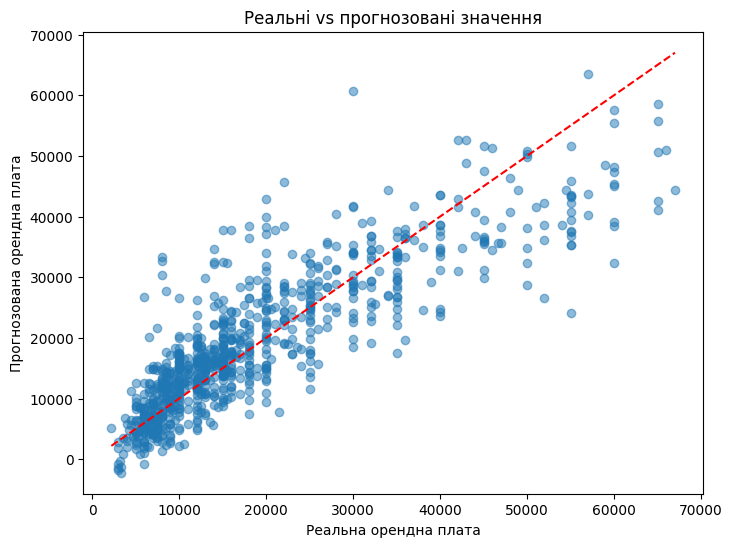

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Реальна орендна плата")
plt.ylabel("Прогнозована орендна плата")
plt.title("Реальні vs прогнозовані значення")
plt.show()

R²: 0.728 свідчить про непоганий результат прогнозування. Модель не "перетренована". Високий показник RMSE свідчить про те що маємо суттєві випадки з великими похибками у прогнозуванні.

## Етап 7: Аналіз помилок 
На цьому етапі проаналізовано помилки моделі (residuals), щоб оцінити стабільність прогнозів, виявити потенційні упередження та визначити напрями для покращення якості моделі.
**Виконані дії:**
1. Побудовано гістограму розподілу помилок.
2. Створено scatter plot помилок відносно прогнозованих значень.
3. Визначено 5 випадків із найбільшими відхиленнями між реальними й прогнозованими значеннями.
4. Проаналізовано, для яких типів житла модель помиляється найбільше.


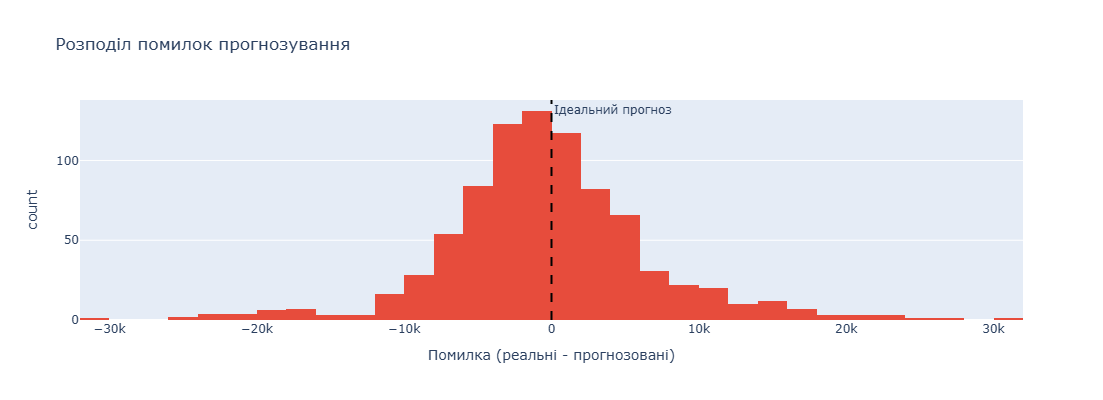

In [27]:
residuals = y_test - y_test_pred

fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані)', 'count': 'Кількість'},
    color_discrete_sequence=['#e74c3c']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.update_layout(height=400)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік6.png",
    scale=2,      
    width=900,
    height=600
)


https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA6.png

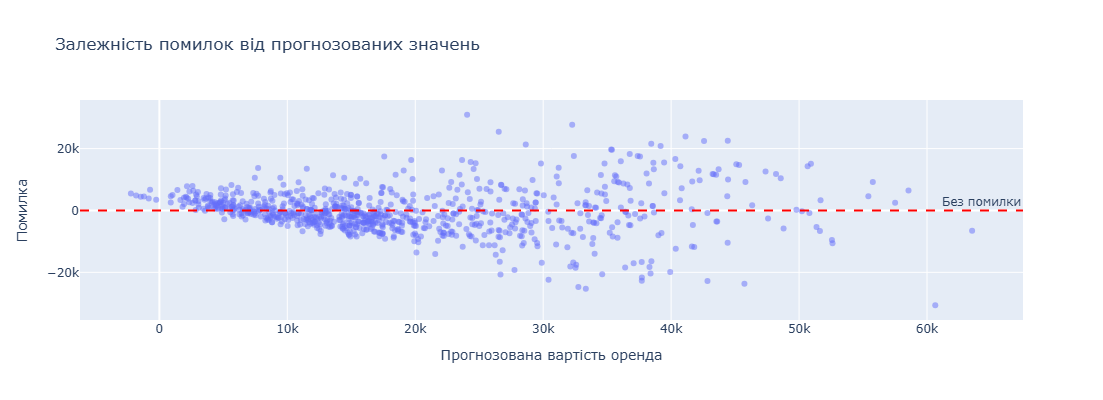

In [28]:
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозована вартість оренда', 'y': 'Помилка'},
    opacity=0.5
)

# Додаємо горизонтальну лінію на 0
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_layout(height=400)
fig.show()
fig.write_image(
    r"C:\Users\Svitlana\data\Профіль проєктів\dashboard_графік7.png",
    scale=2,      
    width=900,
    height=600
)

https://github.com/Svitlana-Osm/rent-prediction-model/blob/main/graphs/dashboard_%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA7.png

На графіку видно що до 20 000 більш компактні та зосереджені біля 0. При більш вищій орендній платі розкид помилок значно більший. Це свідчить про те що при помилка зростає із зростанням орендної плати.

In [29]:
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
print("Найбільші різниці в прогнозах:")
print(top_errors)

Найбільші різниці в прогнозах:
       real     predicted         error
4408  55000  24052.501574  30947.498426
275   30000  60644.879473  30644.879473
2826  60000  32266.301020  27733.698980
2512  52000  26525.899432  25474.100568
852    8000  33332.081045  25332.081045


Висновок:   
 Виведення найбільших помилок у прогнозі підтвердив попередній висновок що модель найбільше помиляється при прогнозуванні високої орендної плати. 
Для того щоб побудувати більш точну  модель, можливо варто розділити показники орендної плати на високу, середню та низьку, а потім аналізувати в межах цих груп. Така стратифікація дасть можливість краще моделі уловлювати тенденції того чи іншого виду житла.